In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [3]:
df = pd.read_csv("data/airline_delay_causes.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0,NaN
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0,NaN
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0,NaN
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,NaN
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,NaN


In [4]:
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63552 entries, 0 to 63551
Data columns (total 22 columns):
year                   63552 non-null int64
 month                 63552 non-null int64
carrier                63552 non-null object
carrier_name           63552 non-null object
airport                63552 non-null object
airport_name           63552 non-null object
arr_flights            63468 non-null float64
arr_del15              63290 non-null float64
carrier_ct             63468 non-null float64
 weather_ct            63468 non-null float64
nas_ct                 63468 non-null float64
security_ct            63468 non-null float64
late_aircraft_ct       63468 non-null float64
arr_cancelled          63468 non-null float64
arr_diverted           63468 non-null float64
 arr_delay             63468 non-null float64
 carrier_delay         63468 non-null float64
weather_delay          63468 non-null float64
nas_delay              63468 non-null float64
security_delay         63

In [6]:
df.duplicated().sum()

0

# Cleaning data

In [7]:
df = df.drop('Unnamed: 21',axis=1)

Remove empty column

In [8]:
df = df.dropna()
df.shape

(63290, 21)

Since we have a very small number of Nan values we can remove the rows that have the Nan values without removing a lot from the dataset 

In [9]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,0.00,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,0.00,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,0.00,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,1.98,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,0.99,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63290 entries, 0 to 63551
Data columns (total 21 columns):
year                   63290 non-null int64
 month                 63290 non-null int64
carrier                63290 non-null object
carrier_name           63290 non-null object
airport                63290 non-null object
airport_name           63290 non-null object
arr_flights            63290 non-null float64
arr_del15              63290 non-null float64
carrier_ct             63290 non-null float64
 weather_ct            63290 non-null float64
nas_ct                 63290 non-null float64
security_ct            63290 non-null float64
late_aircraft_ct       63290 non-null float64
arr_cancelled          63290 non-null float64
arr_diverted           63290 non-null float64
 arr_delay             63290 non-null float64
 carrier_delay         63290 non-null float64
weather_delay          63290 non-null float64
nas_delay              63290 non-null float64
security_delay         63

### Wrangle city name from 

In [11]:
df['city'] = df['airport_name'].str.split(',').str[-1].str.split(':').str[0]
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,city
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0,NM
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0,NY
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0,TX
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,GA
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,TX


### Exclude 2020 Data ( since flights were canceled for a couple of months this year due to covid)

In [12]:
df = df[df['year']!='2020']

C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


# Exploration

## Univariate exploration

### Number of airports in the dataset

In [15]:
df.airport_name.unique()

array(['Albuquerque, NM: Albuquerque International Sunport',
       'Albany, NY: Albany International',
       'Amarillo, TX: Rick Husband Amarillo International',
       'Atlanta, GA: Hartsfield-Jackson Atlanta International',
       'Austin, TX: Austin - Bergstrom International',
       'Hartford, CT: Bradley International',
       'Nashville, TN: Nashville International',
       'Boise, ID: Boise Air Terminal', 'Boston, MA: Logan International',
       'Buffalo, NY: Buffalo Niagara International',
       'Baltimore, MD: Baltimore/Washington International Thurgood Marshall',
       'Charleston, SC: Charleston AFB/International',
       'Cleveland, OH: Cleveland-Hopkins International',
       'Charlotte, NC: Charlotte Douglas International',
       'Columbus, OH: John Glenn Columbus International',
       'Colorado Springs, CO: City of Colorado Springs Municipal',
       'Corpus Christi, TX: Corpus Christi International',
       'Dayton, OH: James M Cox/Dayton International',
       '

In [16]:
len(df.airport_name.unique())

371

In [17]:
len(df.airport.unique())

371

There are 371 unqiue airports in this dataset

### Number of air flights per month per airport and carier

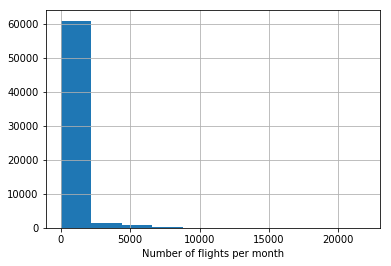

In [18]:
df.arr_flights.hist()
plt.xlabel('Number of flights per month')
plt.show()

In [19]:
df.arr_flights.describe()

count    63290.000000
mean       361.126371
std       1001.393130
min          1.000000
25%         48.000000
50%         94.000000
75%        244.000000
max      21931.000000
Name: arr_flights, dtype: float64

The Number of flights is right skewed where most of the data lies bellow 244. 

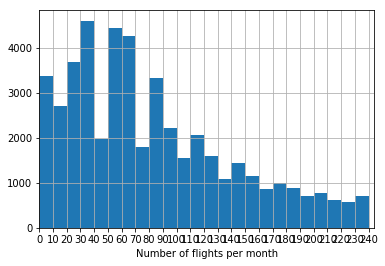

In [22]:
df.arr_flights.hist(bins=list(range(0,244,10)))
plt.xticks(ticks=list(range(0,244,10)))
plt.xlim(0,244)
plt.xlabel('Number of flights per month')
plt.show()

# Weather cancelations

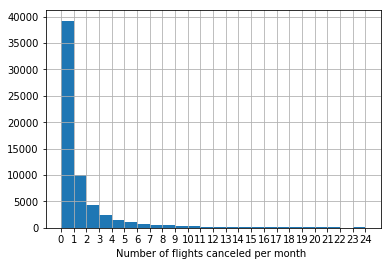

In [23]:
df[' weather_ct'].hist(bins=list(range(0,25,1)))
plt.xlabel('Number of flights canceled per month ')
plt.xticks(ticks=list(range(0,25,1)))
plt.show()

In [24]:
df[' weather_ct'].describe()

count    63290.000000
mean         2.080729
std          6.556104
min          0.000000
25%          0.000000
50%          0.350000
75%          1.750000
max        188.680000
Name:  weather_ct, dtype: float64

Number of flights canceled per month is also left skewed. And 50% of the months did not have any weather delays

### Secuirity cancelations

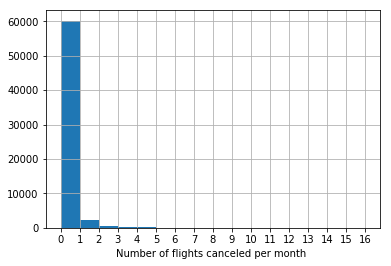

In [25]:
df['security_ct'].hist(bins=list(range(0,17,1)))
plt.xlabel('Number of flights canceled per month ')
plt.xticks(ticks=list(range(0,17,1)))
plt.show()

In [26]:
df['security_ct'].describe()

count    63290.000000
mean         0.118969
std          0.535376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.530000
Name: security_ct, dtype: float64

### Carier cancelations

In [27]:
df["carrier_ct"].describe()

count    63290.000000
mean        17.865492
std         42.972512
min          0.000000
25%          2.000000
50%          5.640000
75%         14.710000
max       1027.450000
Name: carrier_ct, dtype: float64

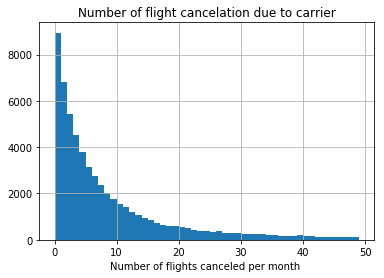

In [28]:
df[df["carrier_ct"]<50]["carrier_ct"].hist(bins=list(range(0,50,1)))
plt.title("Number of flight cancelation due to carrier")
plt.xlabel('Number of flights canceled per month ')
plt.show()

### late aircraft cancelation

In [29]:
df["late_aircraft_ct"].describe()

count    63290.000000
mean        23.072897
std         67.661504
min          0.000000
25%          1.332500
50%          5.210000
75%         15.320000
max       1443.450000
Name: late_aircraft_ct, dtype: float64

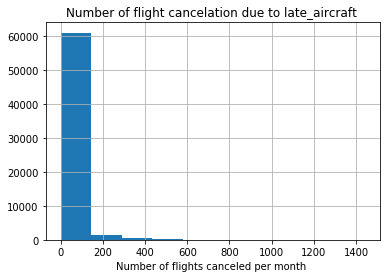

In [30]:
df["late_aircraft_ct"].hist()
plt.title("Number of flight cancelation due to late_aircraft ")
plt.xlabel('Number of flights canceled per month ')
plt.show()

### NAS cancelations

In [31]:
df["nas_ct"].describe()

count    63290.000000
mean        20.439737
std         66.046918
min          0.000000
25%          1.080000
50%          4.000000
75%         11.770000
max       1884.420000
Name: nas_ct, dtype: float64

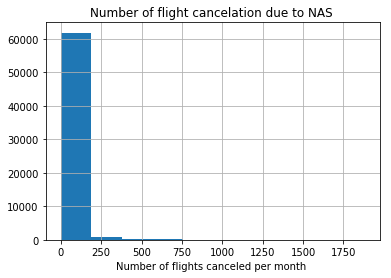

In [32]:
df["nas_ct"].hist()
plt.title("Number of flight cancelation due to NAS ")
plt.xlabel('Number of flights canceled per month ')
plt.show()

### Weather delays

In [33]:
df["weather_delay"].describe()

count    63290.000000
mean       220.699953
std        804.392105
min          0.000000
25%          0.000000
50%         16.000000
75%        142.000000
max      28294.000000
Name: weather_delay, dtype: float64

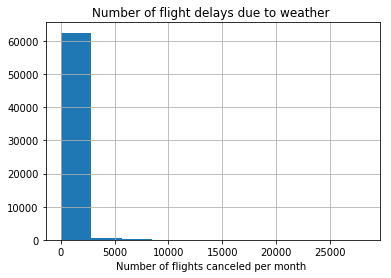

In [34]:
df["weather_delay"].hist()
plt.title("Number of flight delays due to weather ")
plt.xlabel('Number of flights canceled per month ')
plt.show()

### security_delay

In [35]:
df["security_delay"].describe()

count    63290.000000
mean         5.982051
std         37.080653
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3194.000000
Name: security_delay, dtype: float64

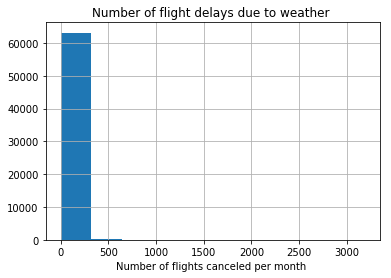

In [36]:
df["security_delay"].hist()
plt.title("Number of flight delays due to weather ")
plt.xlabel('Number of flights canceled per month ')
plt.show()

### NAS delays

In [37]:
df["nas_delay"].describe()

count     63290.000000
mean       1022.182778
std        3962.479431
min           0.000000
25%          38.000000
50%         151.000000
75%         484.000000
max      112018.000000
Name: nas_delay, dtype: float64

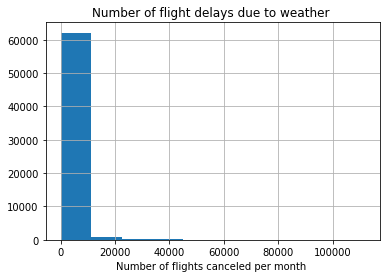

In [38]:
df["nas_delay"].hist()
plt.title("Number of flight delays due to weather ")
plt.xlabel('Number of flights canceled per month ')
plt.show()

# Multi-variate EDA

### Cancelation reasons

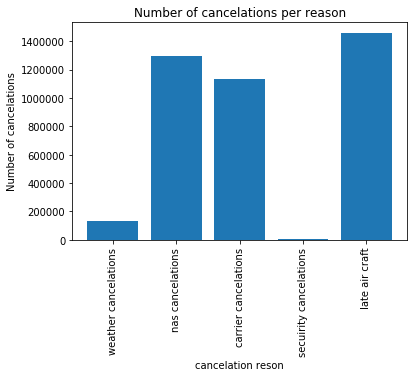

In [39]:
wethear_ct_sum= df[' weather_ct'].sum()
nas_ct_sum= df['nas_ct'].sum()
carrier_ct_sum= df['carrier_ct'].sum()
secuirity_ct_sum =df['security_ct'].sum()
late_aircraft_sum = df['late_aircraft_ct'].sum()


X = ['weather cancelations','nas cancelations', 'carrier cancelations', 'secuirity cancelations','late air craft']
Y = [wethear_ct_sum,nas_ct_sum,carrier_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.bar(X,Y)
plt.ylabel('Number of cancelations')
plt.title('Number of cancelations per reason')
plt.xlabel('cancelation reson')
plt.xticks(rotation=90)
plt.show()

I expected that the number one cancelation reason was due to weather conditions, but this is not the case. Late aircraft cancelation were the number one reason for cancelation and NAS cancelation were the second.

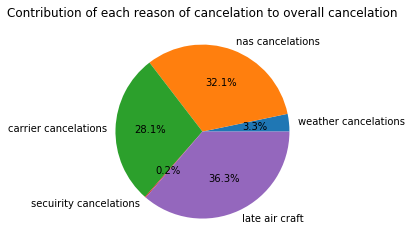

In [41]:
wethear_ct_sum= df[' weather_ct'].sum()
nas_ct_sum= df['nas_ct'].sum()
carrier_ct_sum= df['carrier_ct'].sum()
secuirity_ct_sum =df['security_ct'].sum()
late_aircraft_sum = df['late_aircraft_ct'].sum()

num_of_overall_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+secuirity_ct_sum+late_aircraft_sum

wethear_ct_sum=(wethear_ct_sum/num_of_overall_cancelation)*100
nas_ct_sum=(nas_ct_sum/num_of_overall_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/num_of_overall_cancelation)*100
secuirity_ct_sum=(secuirity_ct_sum/num_of_overall_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/num_of_overall_cancelation)*100


X = ['weather cancelations','nas cancelations', 'carrier cancelations', 'secuirity cancelations','late air craft']
Y = [wethear_ct_sum,nas_ct_sum,carrier_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.pie(Y, labels=X , autopct='%1.1f%%')
plt.title('Contribution of each reason of cancelation to overall cancelation')
plt.show()

We can see here that weather cancelation contribute to only 3.3% of the overall number of cancelations

### Delay reasons

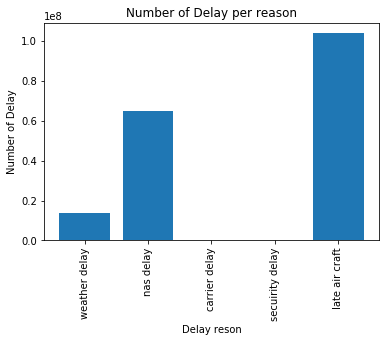

In [42]:
wethear_ct_sum= df['weather_delay'].sum()
nas_ct_sum= df['nas_delay'].sum()
carrier_ct_sum= df[' carrier_delay'].sum()
carrier_ct_sum =df['security_delay'].sum()
late_aircraft_sum = df['late_aircraft_delay'].sum()


X = ['weather delay','nas delay', 'carrier delay', 'secuirity delay','late air craft']
Y = [wethear_ct_sum,nas_ct_sum,carrier_ct_sum, carrier_ct_sum,late_aircraft_sum]
plt.bar(X,Y)
plt.ylabel('Number of Delay')
plt.title('Number of Delay per reason')
plt.xlabel('Delay reson')
plt.xticks(rotation=90)
plt.show()

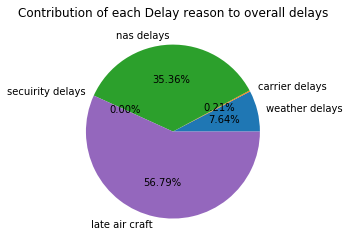

In [44]:
wethear_ct_sum= df['weather_delay'].sum()
nas_ct_sum= df['nas_delay'].sum()
carrier_ct_sum= df[' carrier_delay'].sum()
carrier_ct_sum =df['security_delay'].sum()
late_aircraft_sum = df['late_aircraft_delay'].sum()


num_of_overall_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+secuirity_ct_sum+late_aircraft_sum

wethear_ct_sum=(wethear_ct_sum/num_of_overall_cancelation)*100
nas_ct_sum=(nas_ct_sum/num_of_overall_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/num_of_overall_cancelation)*100
secuirity_ct_sum=(secuirity_ct_sum/num_of_overall_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/num_of_overall_cancelation)*100


X = ['weather delays','carrier delays' , 'nas delays', 'secuirity delays','late air craft']
Y = [wethear_ct_sum,carrier_ct_sum, nas_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.pie(Y, labels=X , autopct='%1.2f%%')
plt.title('Contribution of each Delay reason to overall delays')
plt.show()

Here we can see also that the weather is not the main factor for delays which is also not what I expected. Late air craft was the main reason for delays and then the nas delays. Only 7.64% of delays are caused by weather. 

### Weather cancelations Monthly trends

In [45]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,0.00,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,0.00,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,0.00,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,1.98,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,0.99,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0


In [46]:
df_weather = df[[' month', 'weather_delay']].groupby(' month').sum().reset_index()

In [47]:
df_weather

,month,weather_delay
0,1,1638104.0
1,2,1434738.0
2,3,805294.0
3,4,1092693.0
4,5,1237659.0
5,6,1597358.0
6,7,1684452.0
7,8,1381053.0
8,9,760777.0
9,10,627979.0


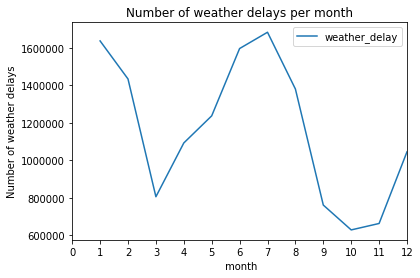

In [51]:
df_weather.plot(x=' month', y='weather_delay' )
plt.xticks(list(range(0,13,1)))
plt.ylabel("Number of weather delays")
plt.title("Number of weather delays per month")
plt.show()

This graph shows a very intesting insight. It shows that the number of flight delays does not only rise in the winter when the weather is both rainy and snowy, but also in summer when the weather hot thus affecting the aicraft's equipment. 

# Which city has the highest number of flight delays

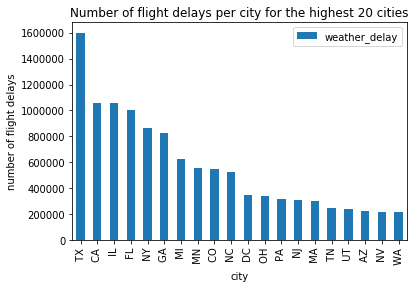

In [13]:
df['city'] = df['airport_name'].str.split(',').str[-1].str.split(':').str[0]
city_delays = df[['city','weather_delay']].groupby('city').sum().reset_index().sort_values('weather_delay',ascending=False)

city_delays = city_delays.iloc[:20]

city_delays.plot.bar(x='city',y='weather_delay')
plt.ylabel("number of flight delays")
plt.title('Number of flight delays per city for the highest 20 cities')
plt.show()